# Health Care Fraud Detection 

## Part I. Exploratory Data Analysis 

In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd

from datetime import datetime

import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns


In [2]:
#df_ip = pd.read_pickle("./df_ip.pkl")
#df_op = pd.read_pickle("./df_op.pkl")

In [3]:
df_ip = pd.read_csv('../../../raw_data/Train_Inpatientdata-1542865627584.csv')

df_op = pd.read_csv('../../../raw_data/Train_Outpatientdata-1542865627584.csv')

df_p = pd.read_csv('../../../raw_data/Train_Beneficiarydata-1542865627584.csv')

flags = pd.read_csv('../../../raw_data/Train-1542865627584.csv')


In [113]:
df_op['InscClaimAmtReimbursed'].value_counts()

100       52943
10        42461
200       41594
60        40762
30        33919
          ...  
1110          1
8020          1
101250        1
5040          1
9600          1
Name: InscClaimAmtReimbursed, Length: 342, dtype: int64

In [4]:
df_ip_test = pd.read_csv('Test_Inpatientdata-1542969243754.csv')

df_op_test = pd.read_csv('Test_Outpatientdata-1542969243754.csv')

df_p_test = pd.read_csv('Test_Beneficiarydata-1542969243754.csv')

test = pd.read_csv('Test-1542969243754.csv')

In [5]:
fmt = '%Y-%m-%d'

df_ip['ClaimStartDt'] = pd.to_datetime(df_ip['ClaimStartDt'], format = '%Y-%m-%d')
df_ip['ClaimEndDt'] = pd.to_datetime(df_ip['ClaimEndDt'], format = '%Y-%m-%d')

df_op['ClaimStartDt'] = pd.to_datetime(df_op['ClaimStartDt'], format = '%Y-%m-%d')
df_op['ClaimEndDt'] = pd.to_datetime(df_op['ClaimEndDt'], format = '%Y-%m-%d')

In [6]:
df_ip['Duration'] = df_ip['ClaimEndDt'] - df_ip['ClaimStartDt']

df_ip['Duration'] = df_ip['Duration']/np.timedelta64(1, 'D')

In [7]:
df_op['Duration'] = df_op['ClaimEndDt'] - df_op['ClaimStartDt']

df_op['Duration'] = df_op['Duration']/np.timedelta64(1, 'D')

We create two dataframes - for inpatients and outpatient beneficiaries, with added flags for each provider. 

In [8]:
df_ip_flags = pd.merge(df_ip, flags, on = 'Provider')
df_op_flags = pd.merge(df_op, flags, on = 'Provider')

In [122]:
df_ip_providers = df_ip_flags.groupby('Provider')

df_op_providers = df_op_flags.groupby('Provider')

In [123]:
df_ip_flags['Provider'].nunique()

2092

In [124]:
df_op_flags['Provider'].nunique()

5012

In [9]:
df_ip_flags['ip_op'] = 1
df_op_flags['ip_op'] = 0

From each of these dataframes, we make two separate dataframes, each containing only providers with or without potential fraud flag, respectively.

In [10]:
df_ip_fraud = df_ip_flags[df_ip_flags['PotentialFraud'] == 'Yes']
df_op_fraud = df_op_flags[df_op_flags['PotentialFraud'] == 'Yes']
df_ip_nfraud = df_ip_flags[df_ip_flags['PotentialFraud'] == 'No']
df_op_nfraud = df_op_flags[df_op_flags['PotentialFraud'] == 'No']

In [125]:
df_ip_fraud['Provider'].nunique()

440

In [126]:
df_ip_nfraud['Provider'].nunique()

1652

In [127]:
df_op_fraud['Provider'].nunique()

462

In [128]:
df_op_nfraud['Provider'].nunique()

4550

In [11]:
df_flags = flags.copy()

In [12]:
fraud = df_flags[df_flags['PotentialFraud'] == 'Yes']
nfraud = df_flags[df_flags['PotentialFraud'] == 'No']

In [13]:
fraud.shape

(506, 2)

In [14]:
nfraud.shape

(4904, 2)

In [15]:
df_fraud = pd.concat([df_ip_fraud, df_op_fraud])
df_nfraud = pd.concat([df_ip_nfraud, df_op_nfraud])

In [16]:
df_fraud.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Duration,PotentialFraud,ip_op
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Yes,1
1,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,12.0,Yes,1
2,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,18.0,Yes,1
3,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,4.0,Yes,1
4,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,...,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,4.0,Yes,1


In [17]:
df_fraud['Provider'].nunique()

506

In [18]:
df_nfraud['Provider'].nunique()

4904

### Total Revenue

In [19]:
df_fraud['TotalRev'] = df_fraud['InscClaimAmtReimbursed'] + df_fraud['DeductibleAmtPaid']


df_nfraud['TotalRev'] = df_nfraud['InscClaimAmtReimbursed'] + df_nfraud['DeductibleAmtPaid']

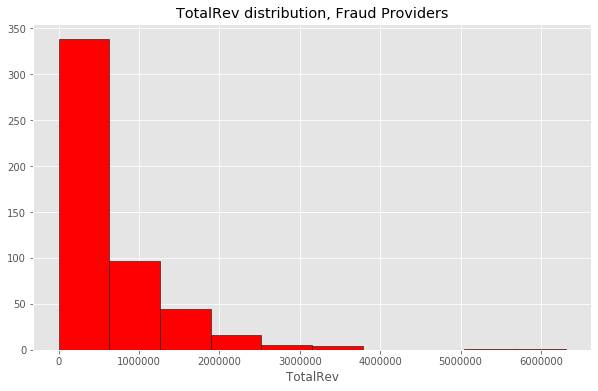

In [100]:
fig = plt.figure(figsize=(10,6))
plt.hist(fraud.TotalRev, facecolor = 'r', edgecolor = 'k')
plt.xlabel('TotalRev')
plt.title('TotalRev distribution, Fraud Providers')
plt.show()

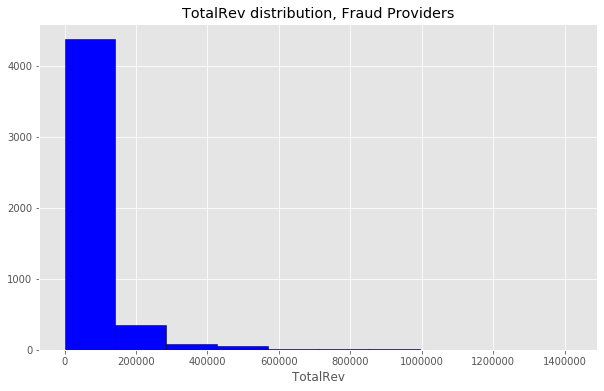

In [101]:
fig = plt.figure(figsize=(10,6))
plt.hist(nfraud.TotalRev, facecolor = 'b', edgecolor = 'k')
plt.xlabel('TotalRev')
plt.title('TotalRev distribution, Fraud Providers')
plt.show()

### Average Duration of Claims 

In [20]:
AvgDur = df_fraud.groupby('Provider')['Duration'].mean()

AvgDur = AvgDur.to_frame()

fraud = pd.merge(fraud, AvgDur, on = 'Provider')

In [21]:
fraud.head()

,Provider,PotentialFraud,Duration
0,PRV51003,Yes,3.674242
1,PRV51005,Yes,1.088412
2,PRV51021,Yes,2.000000
3,PRV51037,Yes,1.533040
4,PRV51052,Yes,2.282609


In [22]:
AvgDur = df_nfraud.groupby('Provider')['Duration'].mean()

AvgDur = AvgDur.to_frame()

nfraud = pd.merge(nfraud, AvgDur, on = 'Provider')

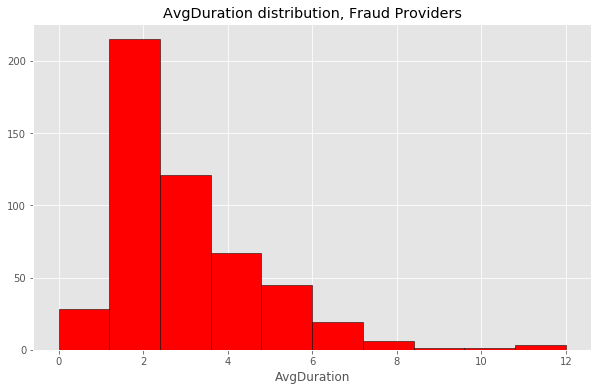

In [23]:
fig = plt.figure(figsize=(10,6))
plt.hist(fraud.Duration, facecolor = 'r', edgecolor = 'k')
plt.xlabel('AvgDuration')
plt.title('AvgDuration distribution, Fraud Providers')
plt.show()

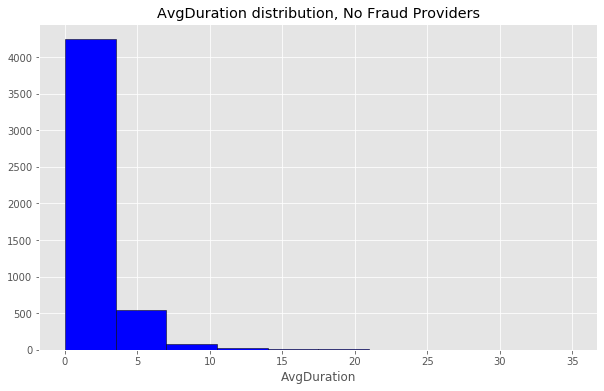

In [24]:
fig = plt.figure(figsize=(10,6))
plt.hist(nfraud.Duration, facecolor = 'b', edgecolor = 'k')
plt.xlabel('AvgDuration')
plt.title('AvgDuration distribution, No Fraud Providers')
plt.show()

### Number of Claims per Patient

The type of healthcare insurance fraud called 'unbundling' or 'fragmenting' could be detected if we analyse the number of claims per patient, for each provider. Fraudulent providers would increase their profits by billing the procedures separately (unbundling), thus creating a higher number of claims per patient. 

In [25]:
NumOfPt = df_fraud.groupby('Provider')['BeneID'].nunique()

NumOfPt = NumOfPt.to_frame()

fraud = pd.merge(fraud, NumOfPt, on = 'Provider')

In [26]:
fraud.columns

Index(['Provider', 'PotentialFraud', 'Duration', 'BeneID'], dtype='object')

In [27]:
NumOfPt = df_nfraud.groupby('Provider')['BeneID'].nunique()

NumOfPt = NumOfPt.to_frame()

nfraud = pd.merge(nfraud, NumOfPt, on = 'Provider')

In [28]:
NumOfClm = df_fraud.groupby('Provider')['ClaimID'].count()

NumOfClm = NumOfClm.to_frame()

fraud = pd.merge(fraud, NumOfClm, on = 'Provider')

fraud.rename({'ClaimID': 'NumOfClm', 'BeneID': 'NumOfPt','Duration': 'AvgDuration'}, axis = 1,\
            inplace = True)

In [29]:
NumOfClm = df_nfraud.groupby('Provider')['ClaimID'].count()

NumOfClm = NumOfClm.to_frame()

nfraud = pd.merge(nfraud, NumOfClm, on = 'Provider')

nfraud.rename({'ClaimID': 'NumOfClm', 'BeneID': 'NumOfPt', 'Duration': 'AvgDuration'}, axis = 1,\
            inplace = True)

In [30]:
nfraud.columns

Index(['Provider', 'PotentialFraud', 'AvgDuration', 'NumOfPt', 'NumOfClm'], dtype='object')

In [31]:
fraud['ClmPerPt'] = fraud['NumOfClm']/fraud['NumOfPt']

In [32]:
nfraud['ClmPerPt'] = nfraud['NumOfClm']/nfraud['NumOfPt']

In [33]:
fraud.head()

,Provider,PotentialFraud,AvgDuration,NumOfPt,NumOfClm,ClmPerPt
0,PRV51003,Yes,3.674242,117,132,1.128205
1,PRV51005,Yes,1.088412,495,1165,2.353535
2,PRV51021,Yes,2.000000,208,257,1.235577
3,PRV51037,Yes,1.533040,206,454,2.203883
4,PRV51052,Yes,2.282609,37,46,1.243243


In [34]:
nfraud.head()

,Provider,PotentialFraud,AvgDuration,NumOfPt,NumOfClm,ClmPerPt
0,PRV51001,No,1.440000,24,25,1.041667
1,PRV51004,No,1.429530,138,149,1.079710
2,PRV51007,No,0.958333,58,72,1.241379
3,PRV51008,No,1.534884,36,43,1.194444
4,PRV51011,No,0.551724,53,58,1.094340


In [35]:
#fraud.rename({'Duration': 'AvgDuration', 'BeneID_y': 'NumOfPt'}, axis = 1,\
#            inplace = True)

In [36]:
fraud['AvgDuration'] = fraud['AvgDuration'].round(2)
fraud['ClmPerPt'] = fraud['ClmPerPt'].round(2)

nfraud['AvgDuration'] = nfraud['AvgDuration'].round(2)
nfraud['ClmPerPt'] = nfraud['ClmPerPt'].round(2)

In [37]:
fraud.head()

,Provider,PotentialFraud,AvgDuration,NumOfPt,NumOfClm,ClmPerPt
0,PRV51003,Yes,3.67,117,132,1.13
1,PRV51005,Yes,1.09,495,1165,2.35
2,PRV51021,Yes,2.00,208,257,1.24
3,PRV51037,Yes,1.53,206,454,2.20
4,PRV51052,Yes,2.28,37,46,1.24


In [38]:
nfraud.head()

,Provider,PotentialFraud,AvgDuration,NumOfPt,NumOfClm,ClmPerPt
0,PRV51001,No,1.44,24,25,1.04
1,PRV51004,No,1.43,138,149,1.08
2,PRV51007,No,0.96,58,72,1.24
3,PRV51008,No,1.53,36,43,1.19
4,PRV51011,No,0.55,53,58,1.09


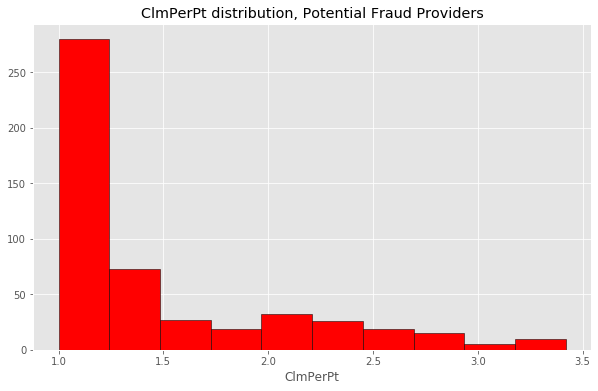

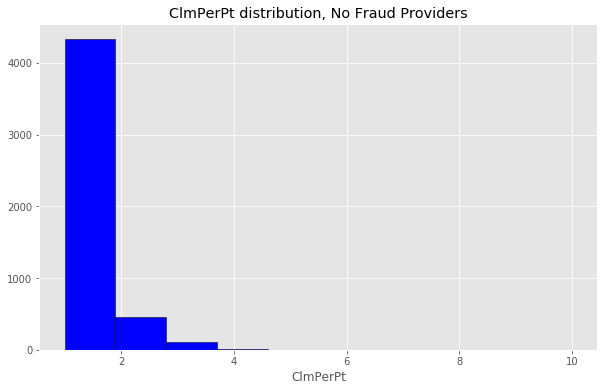

In [39]:
fig = plt.figure(figsize=(10,6))

plt.subplot(1,1,1)

plt.hist(fraud.ClmPerPt, facecolor = 'r', edgecolor = 'k')
plt.xlabel('ClmPerPt')
plt.title('ClmPerPt distribution, Potential Fraud Providers')
plt.show()

fig = plt.figure(figsize=(10,6))

plt.subplot(1,1,1)

plt.hist(nfraud.ClmPerPt, facecolor = 'b', edgecolor = 'k')
plt.xlabel('ClmPerPt')
plt.title('ClmPerPt distribution, No Fraud Providers')
plt.show()

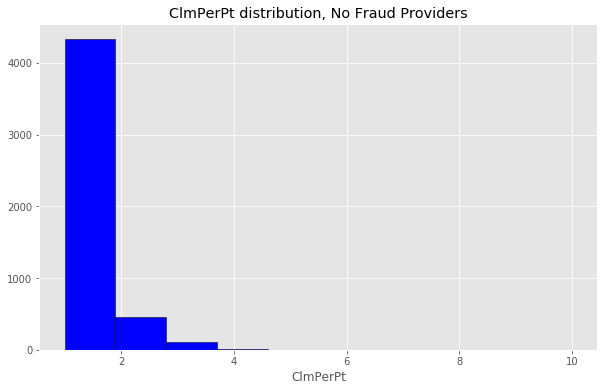

In [40]:
fig = plt.figure(figsize=(10,6))
plt.hist(nfraud.ClmPerPt, facecolor = 'b', edgecolor = 'k')
plt.xlabel('ClmPerPt')
plt.title('ClmPerPt distribution, No Fraud Providers')
plt.show()

### Number of Claims 

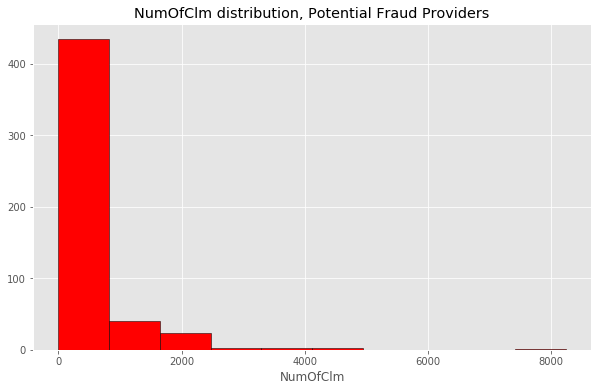

In [41]:
fig = plt.figure(figsize=(10,6))
plt.hist(fraud.NumOfClm, facecolor = 'r', edgecolor = 'k')
plt.xlabel('NumOfClm')
plt.title('NumOfClm distribution, Potential Fraud Providers')
plt.show()

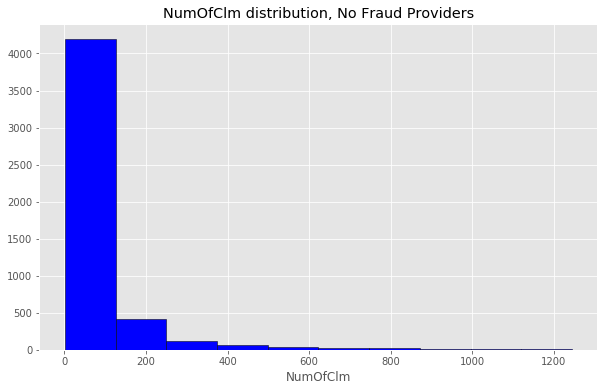

In [42]:
fig = plt.figure(figsize=(10,6))
plt.hist(nfraud.NumOfClm, facecolor = 'b', edgecolor = 'k')
plt.xlabel('NumOfClm')
plt.title('NumOfClm distribution, No Fraud Providers')
plt.show()

### Revenue Per Patient

The type of fraud called 'upcoding' could be detected if we look at how much the providers receive per patient. Noticable difference between potential fraudsters and non fraudsters would indicate that a provider send medical bills that are more expensive than they should have been based on the services they performed. 

In [43]:
TotalRev = df_fraud.groupby('Provider')['TotalRev'].agg('sum')

TotalRev = TotalRev.to_frame()

fraud = pd.merge(fraud, TotalRev, on = 'Provider')

#fraud.rename({'TotalClaim': 'TotalRev'}, axis = 1, inplace = True)

In [44]:
fraud.columns

Index(['Provider', 'PotentialFraud', 'AvgDuration', 'NumOfPt', 'NumOfClm',
       'ClmPerPt', 'TotalRev'],
      dtype='object')

In [45]:
TotalRev = df_nfraud.groupby('Provider')['TotalRev'].agg('sum')

TotalRev = TotalRev.to_frame()

nfraud = pd.merge(nfraud, TotalRev, on = 'Provider')

#nfraud.rename({'TotalClaim': 'TotalRev'}, axis = 1, inplace = True)

In [46]:
nfraud.head()

,Provider,PotentialFraud,AvgDuration,NumOfPt,NumOfClm,ClmPerPt,TotalRev
0,PRV51001,No,1.44,24,25,1.04,109980.0
1,PRV51004,No,1.43,138,149,1.08,52480.0
2,PRV51007,No,0.96,58,72,1.24,36974.0
3,PRV51008,No,1.53,36,43,1.19,37946.0
4,PRV51011,No,0.55,53,58,1.09,17998.0


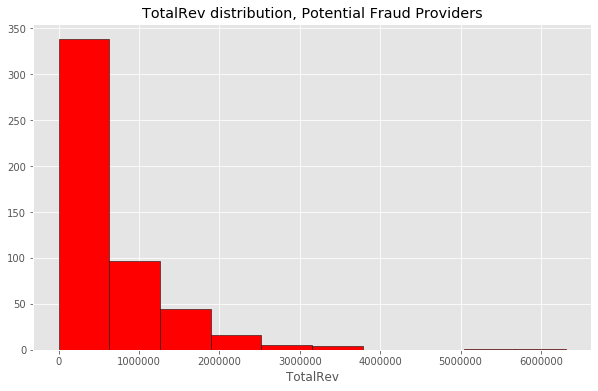

In [47]:
fig = plt.figure(figsize=(10,6))
plt.hist(fraud.TotalRev, facecolor = 'r', edgecolor = 'k')
plt.xlabel('TotalRev')
plt.title('TotalRev distribution, Potential Fraud Providers')
plt.show()

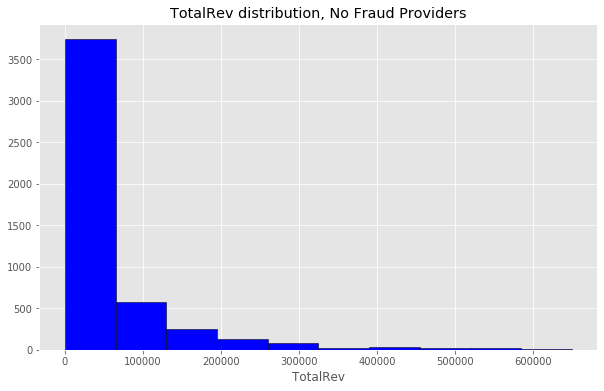

In [48]:
fig = plt.figure(figsize=(10,6))
plt.hist(nfraud.TotalRev, range = [0, 650000],facecolor = 'b', edgecolor = 'k')
plt.xlabel('TotalRev')
plt.title('TotalRev distribution, No Fraud Providers')
plt.show()

In [49]:
fraud['RevPerPt'] = fraud['TotalRev']/fraud['NumOfPt']
nfraud['RevPerPt'] = nfraud['TotalRev']/nfraud['NumOfPt']

In [50]:
nfraud.head()

,Provider,PotentialFraud,AvgDuration,NumOfPt,NumOfClm,ClmPerPt,TotalRev,RevPerPt
0,PRV51001,No,1.44,24,25,1.04,109980.0,4582.500000
1,PRV51004,No,1.43,138,149,1.08,52480.0,380.289855
2,PRV51007,No,0.96,58,72,1.24,36974.0,637.482759
3,PRV51008,No,1.53,36,43,1.19,37946.0,1054.055556
4,PRV51011,No,0.55,53,58,1.09,17998.0,339.584906


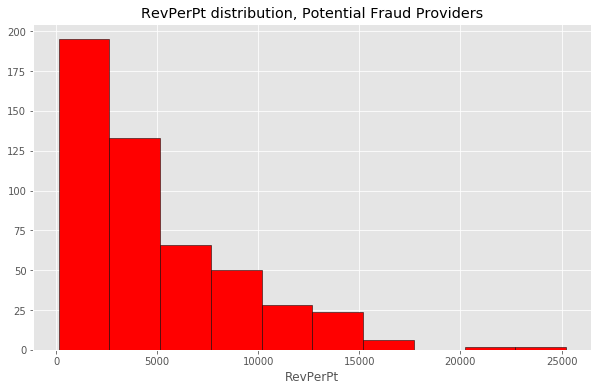

In [51]:
fig = plt.figure(figsize=(10,6))
plt.hist(fraud.RevPerPt, facecolor = 'r', edgecolor = 'k')
plt.xlabel('RevPerPt')
plt.title('RevPerPt distribution, Potential Fraud Providers')
plt.show()

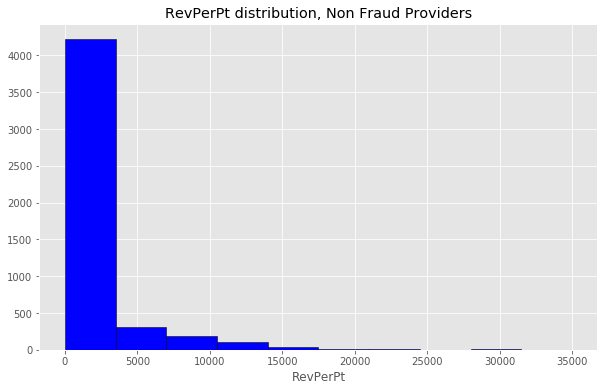

In [52]:
fig = plt.figure(figsize=(10,6))
plt.hist(nfraud.RevPerPt, range = (0, 35000),facecolor = 'b', edgecolor = 'k')
plt.xlabel('RevPerPt')
plt.title('RevPerPt distribution, Non Fraud Providers')
plt.show()

In [53]:
fraud['RevPerPt'] = fraud['RevPerPt'].round(2)

nfraud['RevPerPt'] = nfraud['RevPerPt'].round(2)

fraud['TotalRev'] = fraud['TotalRev'].round(0).astype(int)

nfraud['TotalRev'] = nfraud['TotalRev'].round(0).astype(int)

In [54]:
fraud.head()

,Provider,PotentialFraud,AvgDuration,NumOfPt,NumOfClm,ClmPerPt,TotalRev,RevPerPt
0,PRV51003,Yes,3.67,117,132,1.13,671956,5743.21
1,PRV51005,Yes,1.09,495,1165,2.35,284610,574.97
2,PRV51021,Yes,2.00,208,257,1.24,380322,1828.47
3,PRV51037,Yes,1.53,206,454,2.20,367754,1785.21
4,PRV51052,Yes,2.28,37,46,1.24,33146,895.84


In [55]:
nfraud.head()

,Provider,PotentialFraud,AvgDuration,NumOfPt,NumOfClm,ClmPerPt,TotalRev,RevPerPt
0,PRV51001,No,1.44,24,25,1.04,109980,4582.50
1,PRV51004,No,1.43,138,149,1.08,52480,380.29
2,PRV51007,No,0.96,58,72,1.24,36974,637.48
3,PRV51008,No,1.53,36,43,1.19,37946,1054.06
4,PRV51011,No,0.55,53,58,1.09,17998,339.58


### Number of Claims with No Attending Physician

In [56]:
NoPhy = df_fraud.AttendingPhysician.isnull().groupby(df_fraud['Provider']).sum().astype(int).reset_index(name = 'count')

In [57]:
NoPhy['count'].describe()

count    506.000000
mean       1.114625
std        2.342611
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       33.000000
Name: count, dtype: float64

## Number of Physicians Per Claim

In [58]:
df_phy_fraud = df_fraud[['AttendingPhysician', 'OperatingPhysician', \
                    'OtherPhysician']]

df_phy_nfraud = df_nfraud[['AttendingPhysician', 'OperatingPhysician', \
                    'OtherPhysician']]

In [59]:
(df_phy_fraud.isnull().sum().sort_values(ascending = False))*100/len(df_phy_fraud)

OperatingPhysician    77.936615
OtherPhysician        64.922743
AttendingPhysician     0.265043
dtype: float64

In [60]:
(df_phy_nfraud.isnull().sum().sort_values(ascending = False))*100/len(df_phy_nfraud)

OperatingPhysician    80.459158
OtherPhysician        63.784723
AttendingPhysician     0.273294
dtype: float64

Percentage of fraud and no fraud providers, with the physicians on their claims:

In [61]:
100 - (df_phy_fraud.isnull().sum().sort_values(ascending = False))*100/len(df_phy_fraud)

OperatingPhysician    22.063385
OtherPhysician        35.077257
AttendingPhysician    99.734957
dtype: float64

In [62]:
100 - (df_phy_nfraud.isnull().sum().sort_values(ascending = False))*100/len(df_phy_nfraud)

OperatingPhysician    19.540842
OtherPhysician        36.215277
AttendingPhysician    99.726706
dtype: float64

## Number of Procedure Codes per Patient

In [63]:
df_num_procedure_fraud = df_fraud[['ClmProcedureCode_1', \
                'ClmProcedureCode_2','ClmProcedureCode_3', \
                    'ClmProcedureCode_4', 'ClmProcedureCode_5',\
                                  'ClmProcedureCode_6']]

df_num_procedure_nfraud = df_nfraud[['ClmProcedureCode_1', \
                'ClmProcedureCode_2','ClmProcedureCode_3', \
                    'ClmProcedureCode_4', 'ClmProcedureCode_5',\
                                  'ClmProcedureCode_6']]

In [64]:
(df_num_procedure_fraud.isnull().sum().sort_values(ascending = False))*100/len(df_num_procedure_fraud)

ClmProcedureCode_6    100.000000
ClmProcedureCode_5     99.997180
ClmProcedureCode_4     99.964285
ClmProcedureCode_3     99.735427
ClmProcedureCode_2     98.474595
ClmProcedureCode_1     93.644617
dtype: float64

In [65]:
(df_num_procedure_nfraud.isnull().sum().sort_values(ascending = False))*100/len(df_num_procedure_nfraud)

ClmProcedureCode_6    100.000000
ClmProcedureCode_5     99.999131
ClmProcedureCode_4     99.987841
ClmProcedureCode_3     99.882460
ClmProcedureCode_2     99.350347
ClmProcedureCode_1     97.166886
dtype: float64

Percentage of fraud and no fraud providers that use procedure codes on their claims:

In [66]:
100 - (df_num_procedure_fraud.isnull().sum().sort_values(ascending = False))*100/len(df_num_procedure_fraud)

ClmProcedureCode_6    0.000000
ClmProcedureCode_5    0.002820
ClmProcedureCode_4    0.035715
ClmProcedureCode_3    0.264573
ClmProcedureCode_2    1.525405
ClmProcedureCode_1    6.355383
dtype: float64

In [67]:
100 - (df_num_procedure_nfraud.isnull().sum().sort_values(ascending = False))*100/len(df_num_procedure_nfraud)

ClmProcedureCode_6    0.000000
ClmProcedureCode_5    0.000869
ClmProcedureCode_4    0.012159
ClmProcedureCode_3    0.117540
ClmProcedureCode_2    0.649653
ClmProcedureCode_1    2.833114
dtype: float64

In [69]:
#df_fraud['num_nonanproc_codes'] =  df_fraud['ClmProcedureCode_1'].isnull()

## Number of Diagnosis Codes Per Patient

In [70]:
df_num_diag_fraud = df_fraud[['ClmDiagnosisCode_1', \
                'ClmDiagnosisCode_2','ClmDiagnosisCode_3', \
                    'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',\
                                  'ClmDiagnosisCode_6',\
                      'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',\
                                  'ClmDiagnosisCode_9',\
                             'ClmDiagnosisCode_10']]

In [71]:
df_num_diag_nfraud = df_nfraud[['ClmDiagnosisCode_1', \
                'ClmDiagnosisCode_2','ClmDiagnosisCode_3', \
                    'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',\
                                  'ClmDiagnosisCode_6',\
                      'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',\
                                  'ClmDiagnosisCode_9',\
                             'ClmDiagnosisCode_10']]

In [72]:
(df_num_diag_fraud.isnull().sum().sort_values(ascending = False))*100/len(df_num_diag_fraud)

ClmDiagnosisCode_10    98.734469
ClmDiagnosisCode_9     90.076411
ClmDiagnosisCode_8     87.730972
ClmDiagnosisCode_7     85.305175
ClmDiagnosisCode_6     81.978045
ClmDiagnosisCode_5     77.048441
ClmDiagnosisCode_4     67.894133
ClmDiagnosisCode_3     54.317750
ClmDiagnosisCode_2     33.584748
ClmDiagnosisCode_1      1.802196
dtype: float64

In [73]:
(df_num_diag_fraud.isnull().sum().sort_values(ascending = False))*100/len(df_num_diag_nfraud)

ClmDiagnosisCode_10    60.826252
ClmDiagnosisCode_9     55.492379
ClmDiagnosisCode_8     54.047450
ClmDiagnosisCode_7     52.553016
ClmDiagnosisCode_6     50.503308
ClmDiagnosisCode_5     47.466381
ClmDiagnosisCode_4     41.826788
ClmDiagnosisCode_3     33.462936
ClmDiagnosisCode_2     20.690184
ClmDiagnosisCode_1      1.110259
dtype: float64

In [74]:
100 - (df_num_diag_fraud.isnull().sum().sort_values(ascending = True))*100/len(df_num_diag_fraud)

ClmDiagnosisCode_1     98.197804
ClmDiagnosisCode_2     66.415252
ClmDiagnosisCode_3     45.682250
ClmDiagnosisCode_4     32.105867
ClmDiagnosisCode_5     22.951559
ClmDiagnosisCode_6     18.021955
ClmDiagnosisCode_7     14.694825
ClmDiagnosisCode_8     12.269028
ClmDiagnosisCode_9      9.923589
ClmDiagnosisCode_10     1.265531
dtype: float64

In [75]:
100 - (df_num_diag_fraud.isnull().sum().sort_values(ascending = False))*100/len(df_num_diag_nfraud)

ClmDiagnosisCode_10    39.173748
ClmDiagnosisCode_9     44.507621
ClmDiagnosisCode_8     45.952550
ClmDiagnosisCode_7     47.446984
ClmDiagnosisCode_6     49.496692
ClmDiagnosisCode_5     52.533619
ClmDiagnosisCode_4     58.173212
ClmDiagnosisCode_3     66.537064
ClmDiagnosisCode_2     79.309816
ClmDiagnosisCode_1     98.889741
dtype: float64

# States

In [76]:
df_loc_fraud = pd.merge(df_fraud, df_p, on = 'BeneID')

df_loc_nfraud = pd.merge(df_nfraud, df_p, on = 'BeneID')

In [77]:
fraud_states = df_loc_fraud['State'].unique()
print (sorted(fraud_states))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54]


In [78]:
nfraud_states = df_loc_nfraud['State'].unique()
print (sorted(nfraud_states))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54]


In [79]:
df_loc_nfraud['State'].mode()

0    45
dtype: int64

In [80]:
df_loc_fraud['County'].nunique()

271

In [81]:
df_loc_nfraud['County'].nunique()

311

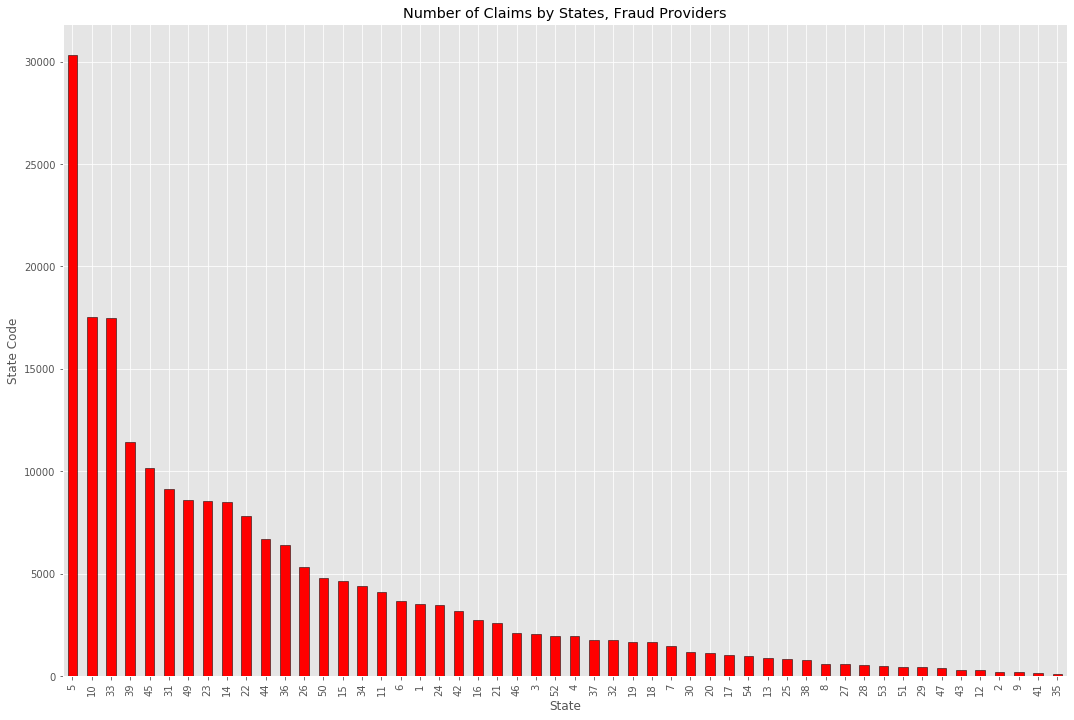

In [82]:
fig = plt.figure(figsize=(18,12))
df_loc_fraud.groupby('State')['ClaimID'].count().sort_values(ascending = False).plot(kind = 'bar',facecolor = 'r', edgecolor = 'k')

plt.ylabel('State Code')
plt.title('Number of Claims by States, Fraud Providers')
plt.show()

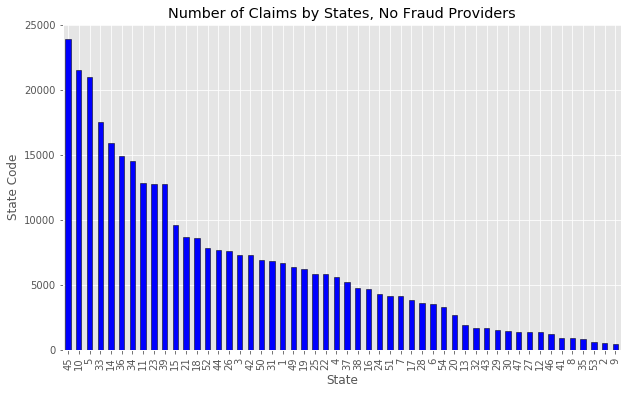

In [83]:
fig = plt.figure(figsize=(10,6))
df_loc_nfraud.groupby('State')['ClaimID'].count().sort_values(ascending = False).plot(kind = 'bar',facecolor = 'b', edgecolor = 'k')

plt.ylabel('State Code')
plt.title('Number of Claims by States, No Fraud Providers')
plt.show()

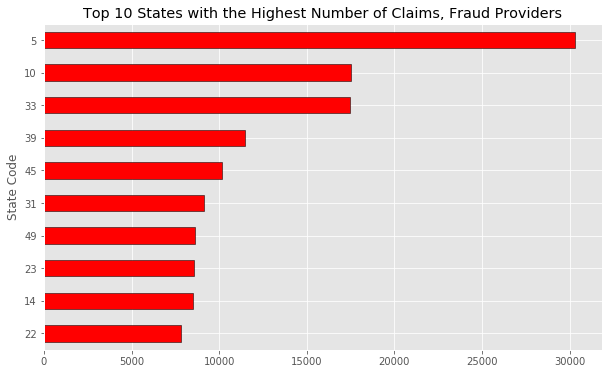

In [84]:
fig = plt.figure(figsize=(10,6))
df_loc_fraud.groupby('State')['ClaimID'].count().sort_values(ascending = True).tail(10).plot(kind = 'barh',facecolor = 'r', edgecolor = 'k')

plt.ylabel('State Code')
plt.title('Top 10 States with the Highest Number of Claims, Fraud Providers')
plt.show()

State Codes:
* 05 - California
* 10 - Florida
* 33 - New York
* 39 - Pennsylvania
* 45 - Texas
* 31 - New Jersey
* 49 - Virginia
* 23 - Michigan
* 14 - Illinois
* 22 - Massachusetts

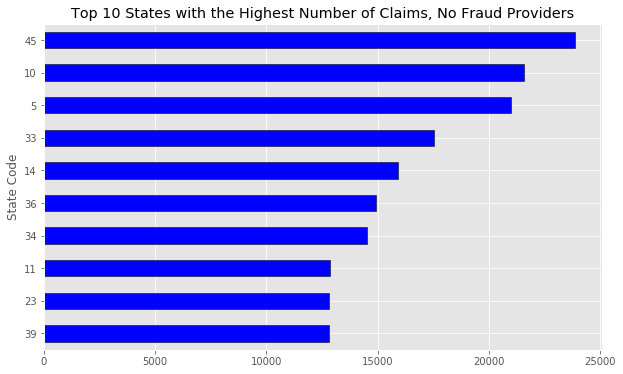

In [85]:
fig = plt.figure(figsize=(10,6))
df_loc_nfraud.groupby('State')['ClaimID'].count().sort_values(ascending = True).tail(10).plot(kind = 'barh',facecolor = 'b', edgecolor = 'k')

plt.ylabel('State Code')
plt.title('Top 10 States with the Highest Number of Claims, No Fraud Providers')
plt.show()

State Codes:
* 45 - Texas
* 10 - Florida
* 5  - California
* 33 - New York
* 14 - Illinois
* 36 - Ohio
* 34 - Oklahoma
* 11 - Georgia
* 23 - Michigan
* 39 - Pennsylvania
    

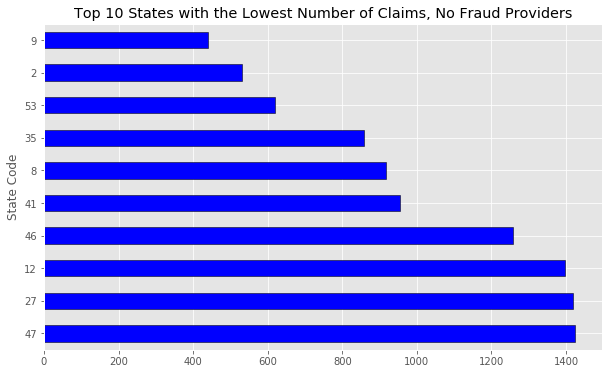

In [86]:
fig = plt.figure(figsize=(10,6))
df_loc_nfraud.groupby('State')['ClaimID'].count().sort_values(ascending = False).tail(10).plot(kind = 'barh',facecolor = 'b', edgecolor = 'k')

plt.ylabel('State Code')
plt.title('Top 10 States with the Lowest Number of Claims, No Fraud Providers')
plt.show()

State Codes
* 9 - District of Columbia
* 2 - Alaska
* 53 - Wyoming
* 35 - North Dakota
* 8 - Delaware
* 41 - Rhode Island
* 46 - Utah
* 12 - Hawaii
* 27 - Montana
* 47 - Vermont


## Counties 

In [87]:
#fig = plt.figure(figsize=(18,12))
#df_loc_fraud.groupby('County')['ClaimID'].count().sort_values(ascending = False).plot(kind = 'bar',facecolor = 'r', edgecolor = 'k')

#plt.ylabel('County Code')
#plt.title('Number of Claims by Counties, Fraud Providers')
#plt.show()

In [88]:
#fig = plt.figure(figsize=(10,6))
#df_loc_nfraud.groupby('County')['ClaimID'].count().sort_values(ascending = False).plot(kind = 'bar',facecolor = 'b', edgecolor = 'k')

#plt.ylabel('County Code')
#plt.title('Number of Claims by Counties, No Fraud Providers')
#plt.show()

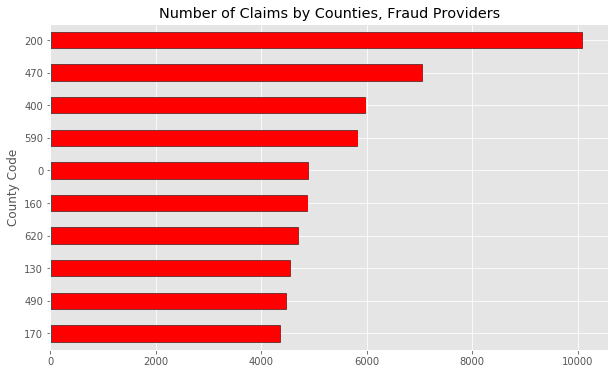

In [89]:
fig = plt.figure(figsize=(10,6))
df_loc_fraud.groupby('County')['ClaimID'].count().sort_values(ascending = True).tail(10).plot(kind = 'barh',facecolor = 'r', edgecolor = 'k')

plt.ylabel('County Code')
plt.title('Number of Claims by Counties, Fraud Providers')
plt.show()

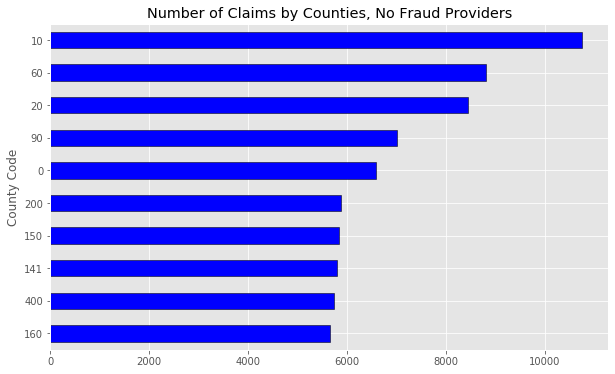

In [90]:
fig = plt.figure(figsize=(10,6))
df_loc_nfraud.groupby('County')['ClaimID'].count().sort_values(ascending = True).tail(10).plot(kind = 'barh',facecolor = 'b', edgecolor = 'k')

plt.ylabel('County Code')
plt.title('Number of Claims by Counties, No Fraud Providers')
plt.show()

In [91]:
df = pd.concat([df_ip_flags, df_op_flags])

In [92]:
#df['ip_op'] = df.PotentialFraud.apply(lambda x: 1 if x == 'Yes' else 0)

In [93]:
df.shape

(558211, 33)

In [94]:
df_unsup = pd.concat([fraud, nfraud])

In [95]:
df = df_unsup.copy()

In [96]:
df.to_pickle("./df.pkl")

In [97]:
df.to_csv('data.csv')

In [98]:
df.head()

,Provider,PotentialFraud,AvgDuration,NumOfPt,NumOfClm,ClmPerPt,TotalRev,RevPerPt
0,PRV51003,Yes,3.67,117,132,1.13,671956,5743.21
1,PRV51005,Yes,1.09,495,1165,2.35,284610,574.97
2,PRV51021,Yes,2.00,208,257,1.24,380322,1828.47
3,PRV51037,Yes,1.53,206,454,2.20,367754,1785.21
4,PRV51052,Yes,2.28,37,46,1.24,33146,895.84


In [104]:
df_clm = df[['Provider', 'PotentialFraud', 'TotalRev']]

In [109]:
df_clm['TotalRev'].describe()

count    5.410000e+03
mean     1.089756e+05
std      2.870060e+05
min      0.000000e+00
25%      4.520000e+03
50%      2.077500e+04
75%      8.915850e+04
max      6.310076e+06
Name: TotalRev, dtype: float64